# Q6

Import some prerequisites:

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [22]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [23]:
def dilate(img, kernel): 
    '''
    Dialates image with given kernel.

    Parameters:
        img (np.ndarray): The image to dialate.
        kernel (np.ndarray): The kernel to dialate image with.

    Returns:
        np.ndarray: The dialated image.
    '''
    
    # initialize output array of zeros with the same shape as input image
    img_dialated = np.zeros(img.shape)

    # for each pixel in the input image, extract a sub-image centered at the pixel with the same size as the kernel
    # select the maximum pixel value in the sub-image that corresponds to a non-zero value in the kernel
    # assign the maximum pixel value as the output pixel value for the corresponding pixel in the output array
    w,h= img.shape 
    cnt=int((kernel.shape[0]-1)/2)
    for i in range(cnt, w-cnt):
        for j in range(cnt,h-cnt):
            temp= img[i-cnt:i+cnt+1, j-cnt:j+cnt+1]
            max = 0
            for x in range (kernel.shape[0]):
                for y in range (kernel.shape[1]):
                    if kernel[x,y] !=0:
                        if temp[x,y] > max:
                            max = temp[x,y]                                        
            img_dialated[i,j]= max    

    # return the dilated image as a 2D NumPy array
    return img_dialated

Test implementation

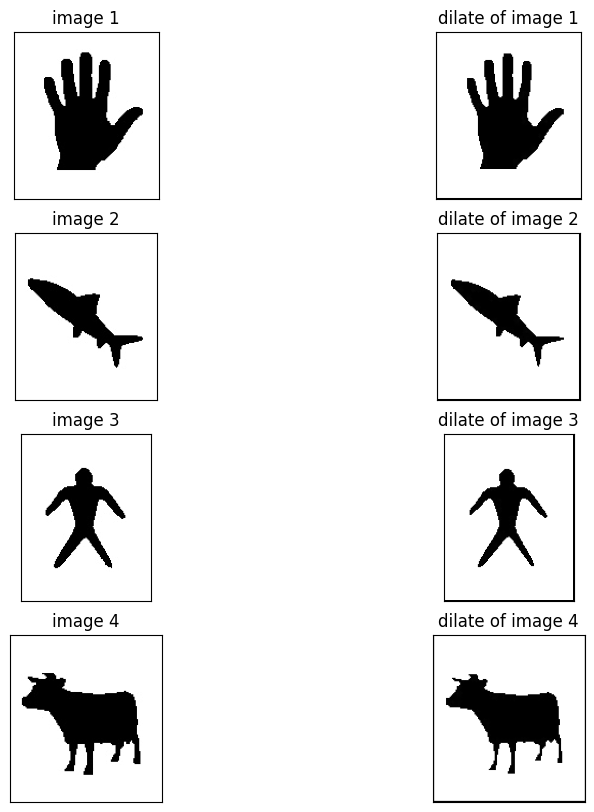

In [24]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-dilate')

In [25]:
def erode(img, kernel): 
    '''
    Erodes image with given kernel.

    Parameters:
        img (np.ndarray): The image to erode.
        kernel (np.ndarray): The kernel to erode image with.

    Returns:
        np.ndarray: The eroded image.
    '''
    
    # initialize output array of zeros with the same shape as input image
    img_eroded = np.zeros(img.shape)
    
    # for each pixel in the input image, extract a sub-image centered at the pixel with the same size as the kernel
    # select the minimum pixel value in the sub-image that corresponds to a non-zero value in the kernel
    # assign the minimum pixel value as the output pixel value for the corresponding pixel in the output array
    w,h= img.shape 
    cnt=int((kernel.shape[0]-1)/2)
    for i in range(cnt, w-cnt):
        for j in range(cnt,h-cnt):
            temp= img[i-cnt:i+cnt+1, j-cnt:j+cnt+1]
            min = 255
            for x in range (kernel.shape[0]):
                for y in range (kernel.shape[1]):
                    if kernel[x,y] !=0:
                        if temp[x,y] < min:                            
                            min = temp[x,y]
            img_eroded[i,j]= min    
    
    # return the eroded image as a 2D NumPy array
    return img_eroded

Test your implementation

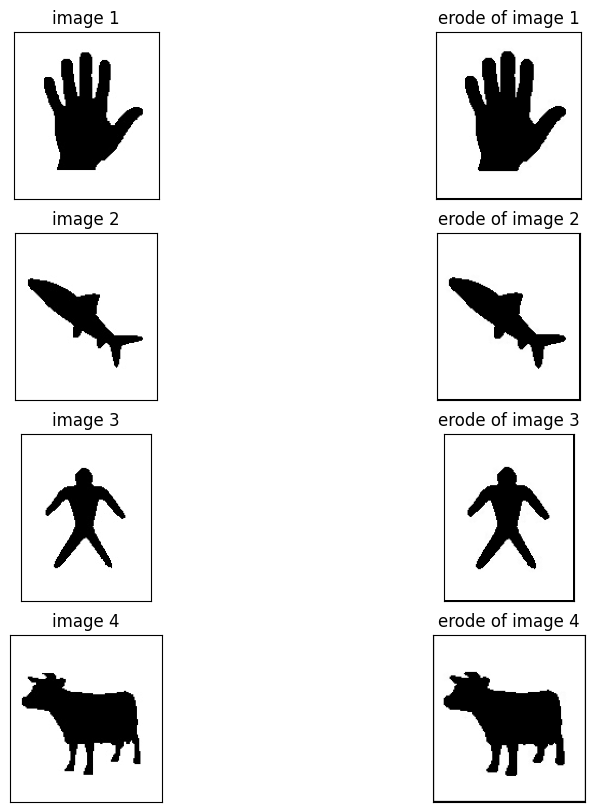

In [26]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-erode')

In [27]:
def open_morphology(img, kernel): 
    '''
    Performs opening morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform opening morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    #Write your code here
    img_erode=erode(img,kernel)
    img_opened=dilate(img_erode,kernel)
    
    return img_opened

Test your implementatino

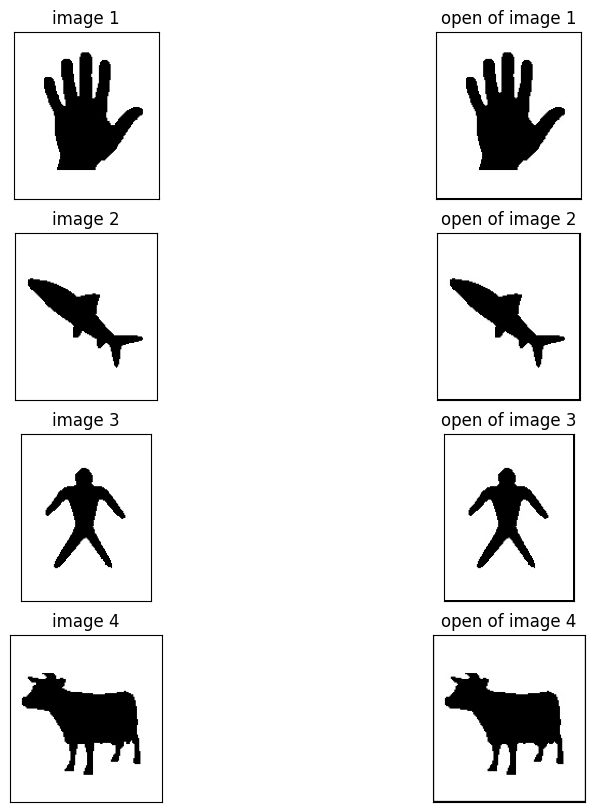

In [28]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-open')

In [29]:
def close_morphology(img, kernel): 
    '''
    Performs closing morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform closing morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    #Write your code here
    img_dialte=dilate(img,kernel)
    img_closed=erode(img_dialte,kernel)
    
    return img_closed

Test your implemention

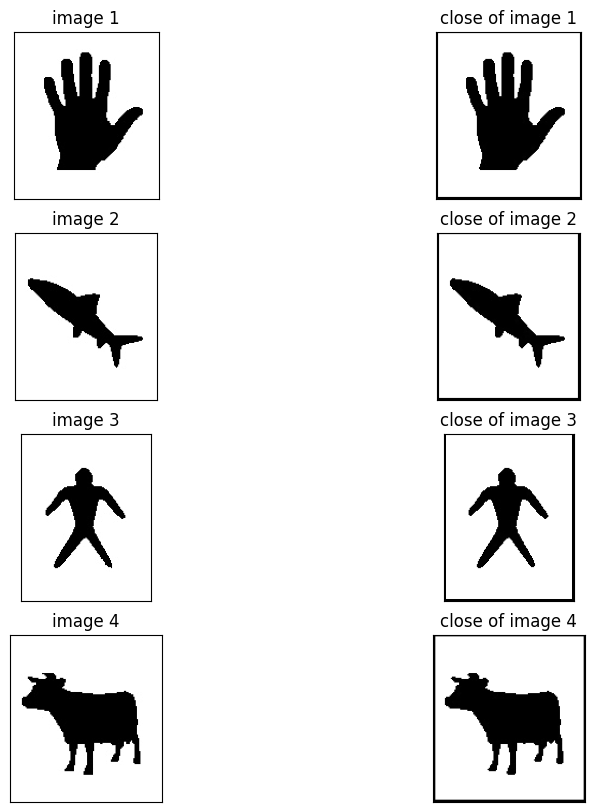

In [30]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-close')

# Part 2

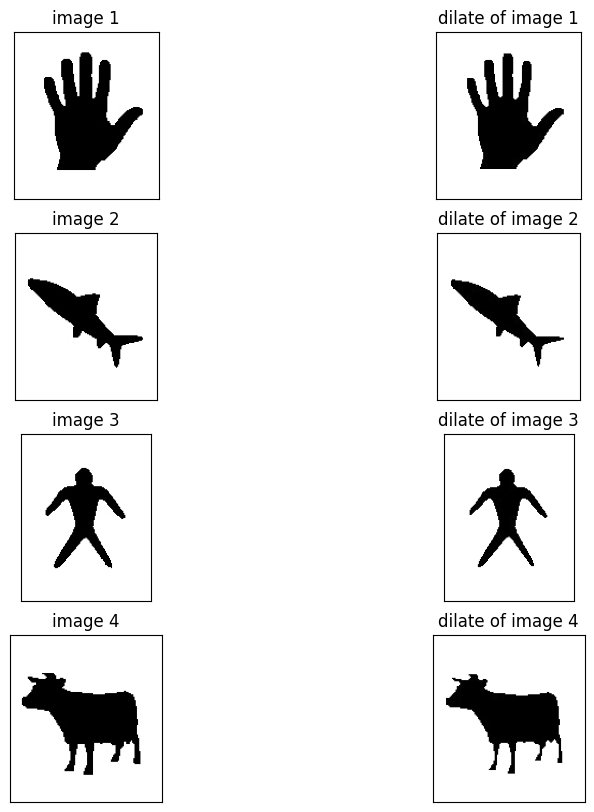

In [31]:
#Write your code here
#Like last part, you should make output of each operation separately. Name output image files like this format: Q6-b-dilate, Q6-b-erode

# dilate

image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = cv2.dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= cv2.dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = cv2.dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = cv2.dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-dilate')



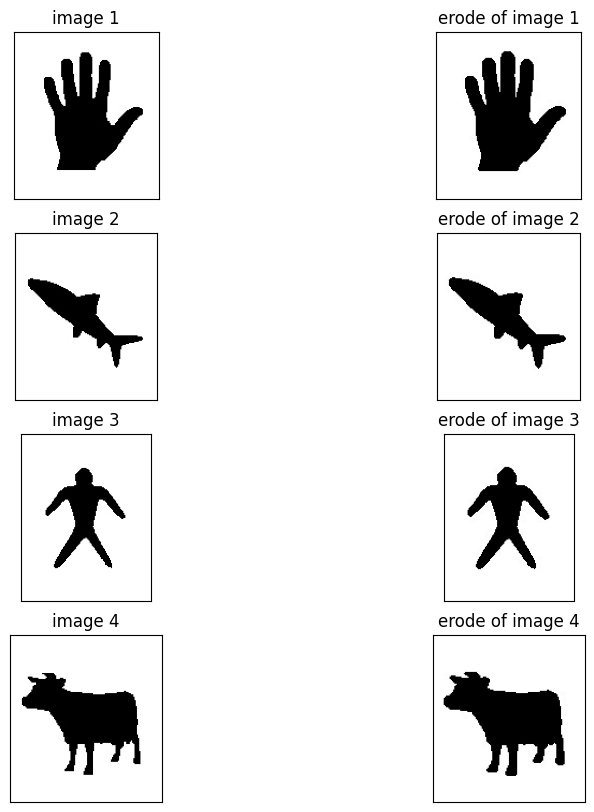

In [32]:
# erode

image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = cv2.erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= cv2.erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = cv2.erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = cv2.erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-erode')



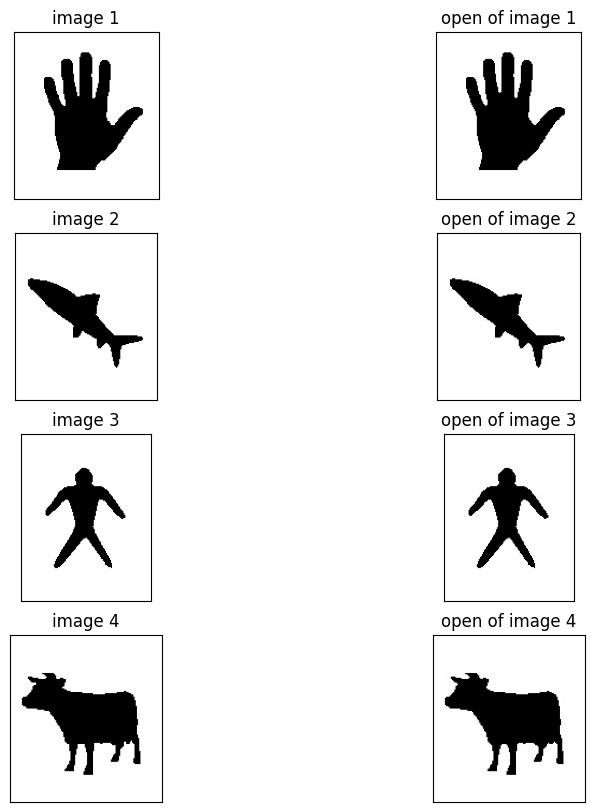

In [33]:
# open_morphology

image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = cv2.morphologyEx(image1,cv2.MORPH_OPEN,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= cv2.morphologyEx(image2,cv2.MORPH_OPEN,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = cv2.morphologyEx(image3,cv2.MORPH_OPEN,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open =cv2.morphologyEx(image4,cv2.MORPH_OPEN,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-open')




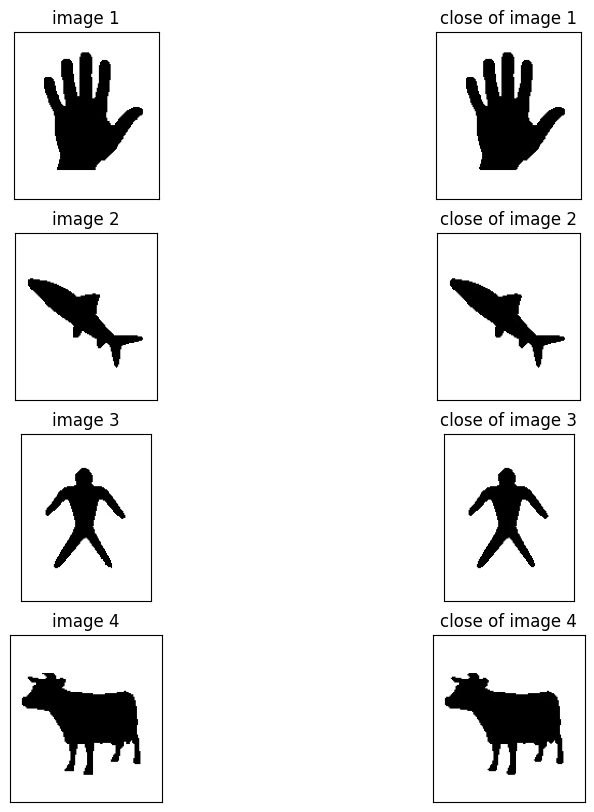

In [34]:
# close_morphology


image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = cv2.morphologyEx(image1,cv2.MORPH_CLOSE,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= cv2.morphologyEx(image2,cv2.MORPH_CLOSE,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = cv2.morphologyEx(image3,cv2.MORPH_CLOSE,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = cv2.morphologyEx(image4,cv2.MORPH_CLOSE,np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-close')



# Part 3: optional
Skeleton of image

In [1]:
def get_skeleton(image,kernel):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    # convert input image to inverted binary image
    _, image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

    # initialize variables
    res = np.zeros(image.shape, np.uint8)
    i=0
    
    # loop until the input binary image is not empty
    while cv2.countNonZero(image)!=0:
        i = i+1
        
        # apply erosion operator
        eroded = cv2.erode(image, kernel)
        
        # apply opening operator
        open_ = cv2.dilate(eroded, kernel)
        
        # apply difference operator between input image and opened image
        diff = cv2.subtract(image, open_)
        
        # apply OR operator on the new image and previous image
        res = cv2.bitwise_or(res, diff)
        
        # update input image
        image = eroded
        
    # convert output image to black and white image
    res = cv2.bitwise_not(res)    
        
    # return the skeleton image as a 2D NumPy array
    return res

Test your implementation (don't change this cell).

In [2]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton = get_skeleton(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton= get_skeleton(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton = get_skeleton(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton = get_skeleton(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],np.uint8))
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-c')

NameError: name 'cv2' is not defined

End!!!